<a href="https://colab.research.google.com/github/AnaghaTantry/ML-project/blob/main/ESR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Epileptic Seizure Recognition.csv')

In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
data.shape

(11500, 180)

In [ ]:
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

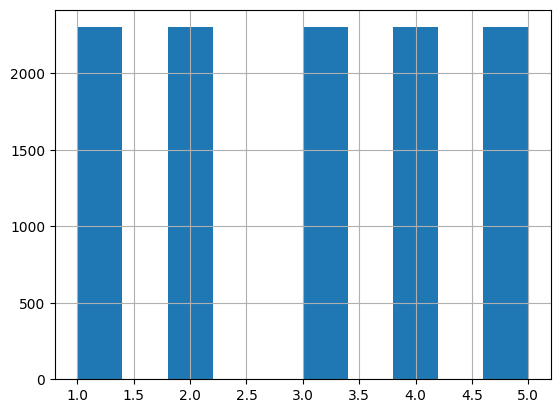

In [ ]:
data.y.hist();

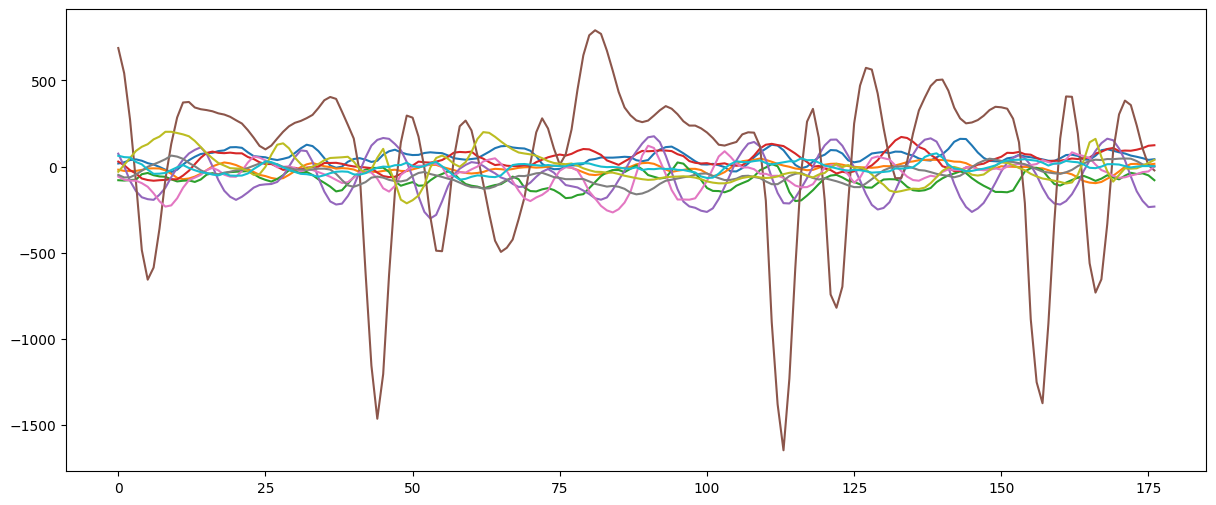

In [ ]:
# Plot initial EEG signals
plt.figure(figsize=(50, 6))
plt.subplot(131)
for i in range(10):
    plt.plot(data.values[i][1:-1])
plt.show()

In [ ]:
# Map the class labels to binary values (Epileptic: 1, Non-Epileptic: 0)
label_map = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(label_map)

In [ ]:
# Verify class distribution
print(data['y'].value_counts())
print(data.head())

y
0    9200
1    2300
Name: count, dtype: int64
      Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  0  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  0  
3   -80   -77   -85   -77   -72   -69   -65  0  
4   -12   -32   -41   -65   -83   -89   -73  0  

[5 rows x 180 columns]


In [ ]:
data = data.drop('Unnamed', axis = 1)

In [ ]:
data = shuffle(data)
print(data.describe())
data.info()

                 X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.033

In [ ]:
# Grouping the data by class
print(f"Number of Non-Epileptic records: {len(data[data['y'] == 0])}\nEpileptic records: {len(data[data['y'] == 1])}")

Number of Non-Epileptic records: 9200
Epileptic records: 2300


In [ ]:
#Description of Non Epileptic
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [ ]:
#Description of Epileptic
data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


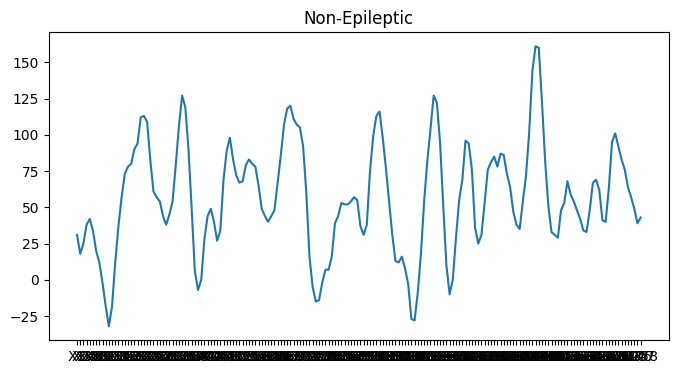

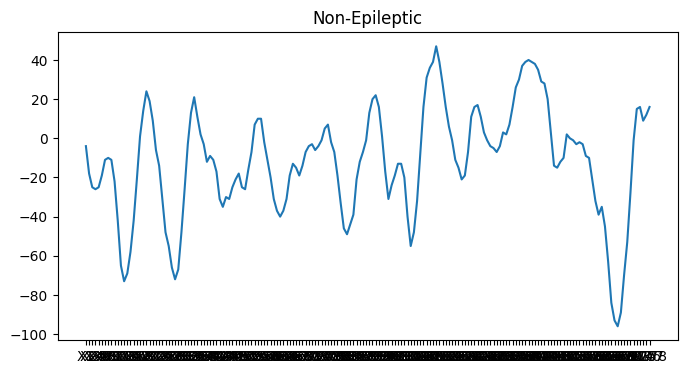

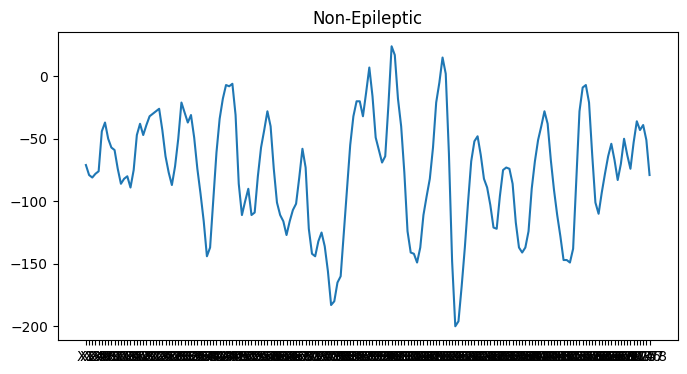

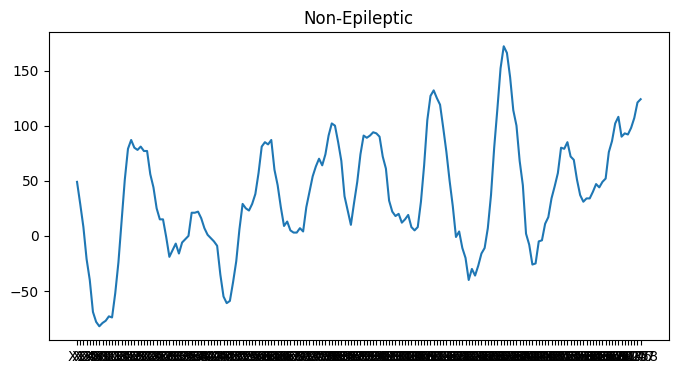

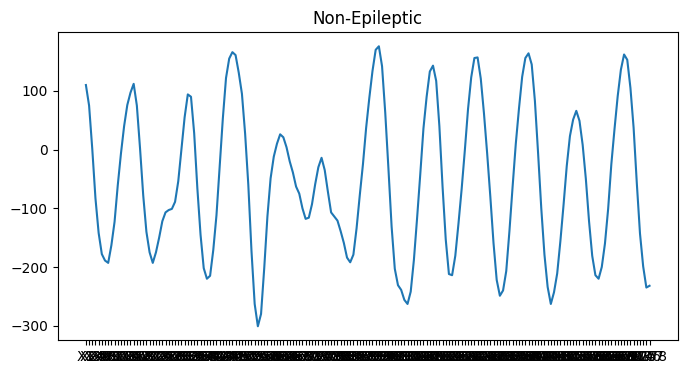

In [ ]:
# Plot a few cases of Non-Epileptic
for i in range(5):
    plt.figure(figsize=(8, 4))
    plt.title('Non-Epileptic')
    plt.plot(data[data['y'] == 0].iloc[i][:-1])
    plt.show()

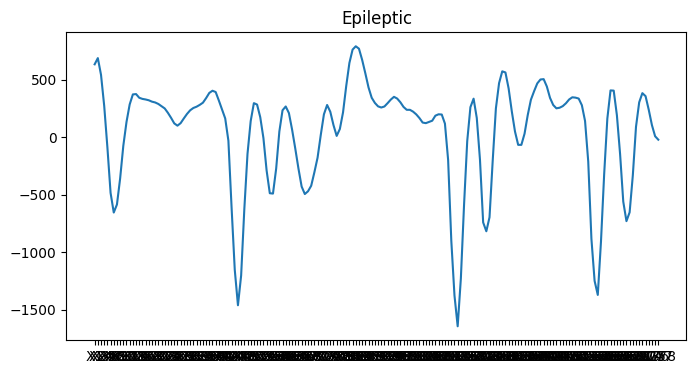

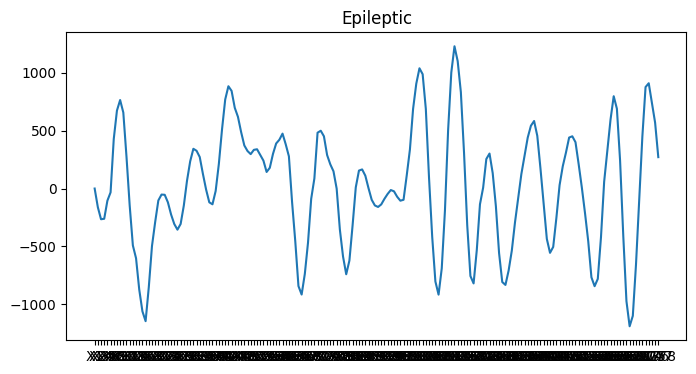

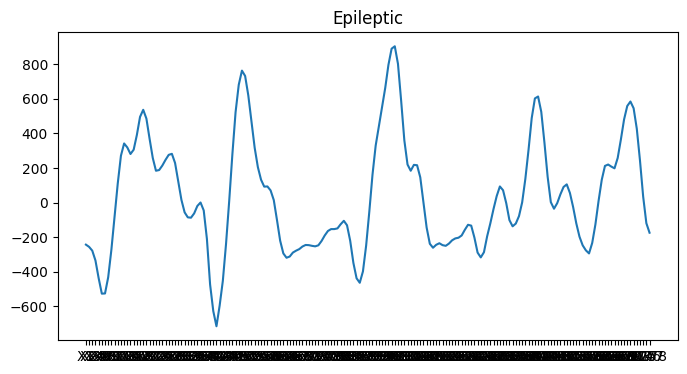

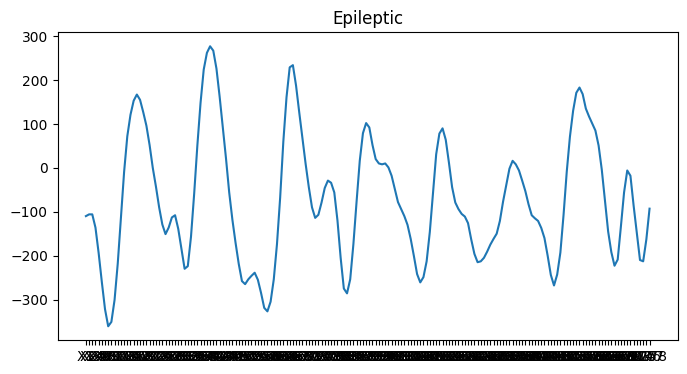

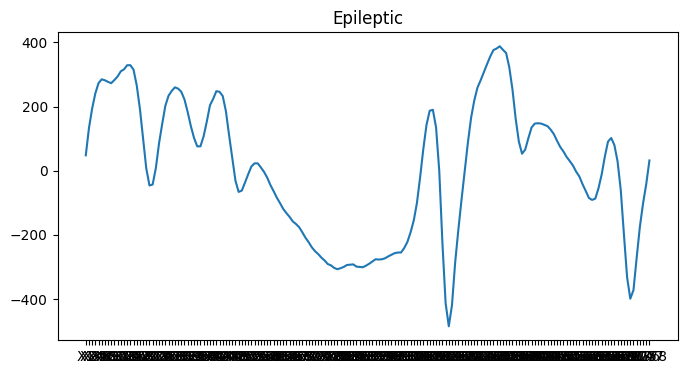

In [ ]:
# Plot a few cases of Epileptic
for i in range(5):
    plt.figure(figsize=(8, 4))
    plt.title('Epileptic')
    plt.plot(data[data['y'] == 1].iloc[i][:-1])
    plt.show()

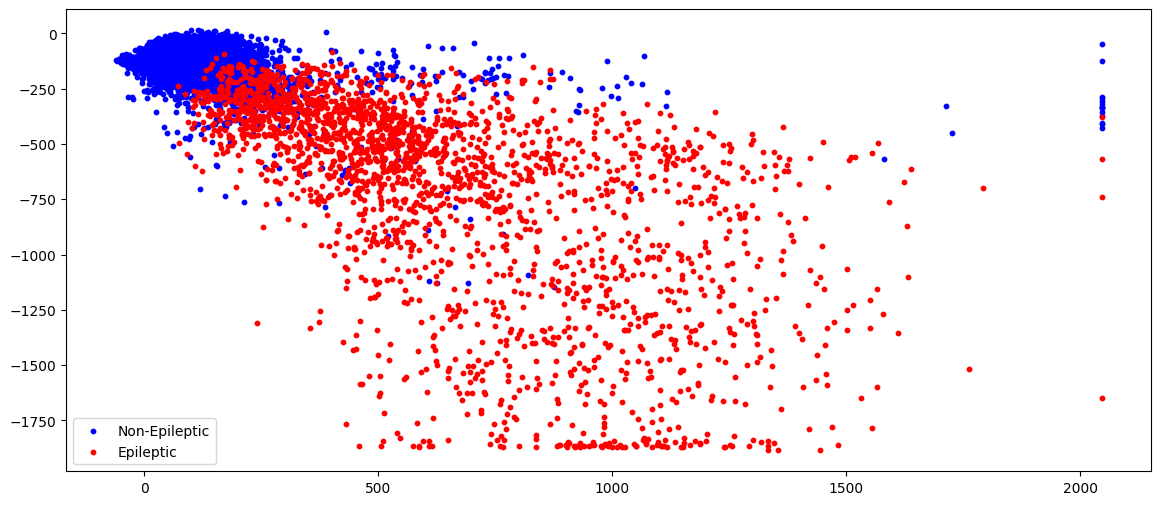

In [ ]:
# Lists of arrays containing all data without the y column
not_epileptic = data[data['y'] == 0].iloc[:, :-1].values
epileptic = data[data['y'] == 1].iloc[:, :-1].values

# Function to calculate 2D indicators (min and max values)
def indic(data):
    """Indicators can be different. In our case, we use just min and max values."""
    max_vals = np.max(data, axis=1)
    min_vals = np.min(data, axis=1)
    return max_vals, min_vals

# Calculate indicators for both classes
x1, y1 = indic(not_epileptic)
x2, y2 = indic(epileptic)

# Plot the indicators
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Non-Epileptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left')
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

# Function to extract features from data
def extract_features(data):
    features = []
    for signal in data:
        mean = np.mean(signal)
        std = np.std(signal)
        skewness = skew(signal)
        kurt = kurtosis(signal)
        features.append([mean, std, skewness, kurt])
    return np.array(features)

# Extract features for both classes
not_epileptic = data[data['y'] == 0].iloc[:, :-1].values
epileptic = data[data['y'] == 1].iloc[:, :-1].values

not_epileptic_features = extract_features(not_epileptic)
epileptic_features = extract_features(epileptic)

# Combine the features and create labels
X = np.vstack((not_epileptic_features, epileptic_features))
y = np.hstack((np.zeros(not_epileptic_features.shape[0]), np.ones(epileptic_features.shape[0])))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Evaluate using cross-validation
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Score: {logreg_scores.mean():.4f} ± {logreg_scores.std():.4f}")

# Train the model on the entire training set
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print(f"Accuracy: {accuracy:.4f} \nPrecision: {precision:.4f}\nRecall: {recall:.4f} \nF1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(f"Confusion Matrix for Logistic Regression:\n{conf_matrix_logreg}")


Logistic Regression Cross-Validation Score: 0.9532 ± 0.0048
Accuracy: 0.9570 
Precision: 0.9491
Recall: 0.8252 
F1 Score: 0.8828
Confusion Matrix for Logistic Regression:
[[1828   20]
 [  79  373]]
Logistic Regression Cross-Validation Score: 0.9532 ± 0.0048
Accuracy: 0.9570 
Precision: 0.9491
Recall: 0.8252 
F1 Score: 0.8828
Confusion Matrix for Logistic Regression:
[[1828   20]
 [  79  373]]


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Evaluate using cross-validation
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
print(f"SVM Cross-Validation Score: {svm_scores.mean():.4f} ± {svm_scores.std():.4f}")

# Train the model on the entire training set
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy:.4f} \nPrecision: {precision:.4f} \nRecall: {recall:.4f} \nF1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Confusion Matrix for SVM:\n{conf_matrix_svm}")


SVM Cross-Validation Score: 0.9678 ± 0.0019
Accuracy: 0.9670 
Precision: 0.9292 
Recall: 0.9004 
F1 Score: 0.9146
Confusion Matrix for SVM:
[[1817   31]
 [  45  407]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Evaluate using cross-validation
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f"KNN Cross-Validation Score: {knn_scores.mean():.4f} ± {knn_scores.std():.4f}")

# Train the model on the entire training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.4f} \nPrecision: {precision:.4f} \nRecall: {recall:.4f} \nF1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix for KNN:\n{conf_matrix_knn}")


KNN Cross-Validation Score: 0.9659 ± 0.0036
Accuracy: 0.9639 
Precision: 0.9261 
Recall: 0.8872 
F1 Score: 0.9062
Confusion Matrix for KNN:
[[1816   32]
 [  51  401]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Evaluate using cross-validation
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Score: {dt_scores.mean():.4f} ± {dt_scores.std():.4f}")

# Train the model on the entire training set
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy:.4f} \nPrecision: {precision:.4f} \nRecall: {recall:.4f} \nF1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Confusion Matrix for Decision Tree:\n{conf_matrix_dt}")


Decision Tree Cross-Validation Score: 0.9565 ± 0.0032
Accuracy: 0.9543 
Precision: 0.8864 
Recall: 0.8805 
F1 Score: 0.8835
Confusion Matrix for Decision Tree:
[[1797   51]
 [  54  398]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Evaluate using cross-validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Score: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")

# Train the model on the entire training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.4f} \nPrecision: {precision:.4f} \nRecall: {recall:.4f} \nF1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix for Random Forest:\n{conf_matrix_rf}")


Random Forest Cross-Validation Score: 0.9710 ± 0.0024
Accuracy: 0.9683 
Precision: 0.9183 
Recall: 0.9204 
F1 Score: 0.9193
Confusion Matrix for Random Forest:
[[1811   37]
 [  36  416]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

# Evaluate using cross-validation
gb_scores = cross_val_score(gb, X_train, y_train, cv=5)
print(f"Gradient Boosting Cross-Validation Score: {gb_scores.mean():.4f} ± {gb_scores.std():.4f}")

# Train the model on the entire training set
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy:.4f} \nPrecision: {precision:.4f} \nRecall: {recall:.4f} \nF1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(f"Confusion Matrix for Gradient Boosting:\n{conf_matrix_gb}")


Gradient Boosting Cross-Validation Score: 0.9668 ± 0.0032
Accuracy: 0.9648 
Precision: 0.8938 
Recall: 0.9314 
F1 Score: 0.9122
Confusion Matrix for Gradient Boosting:
[[1798   50]
 [  31  421]]


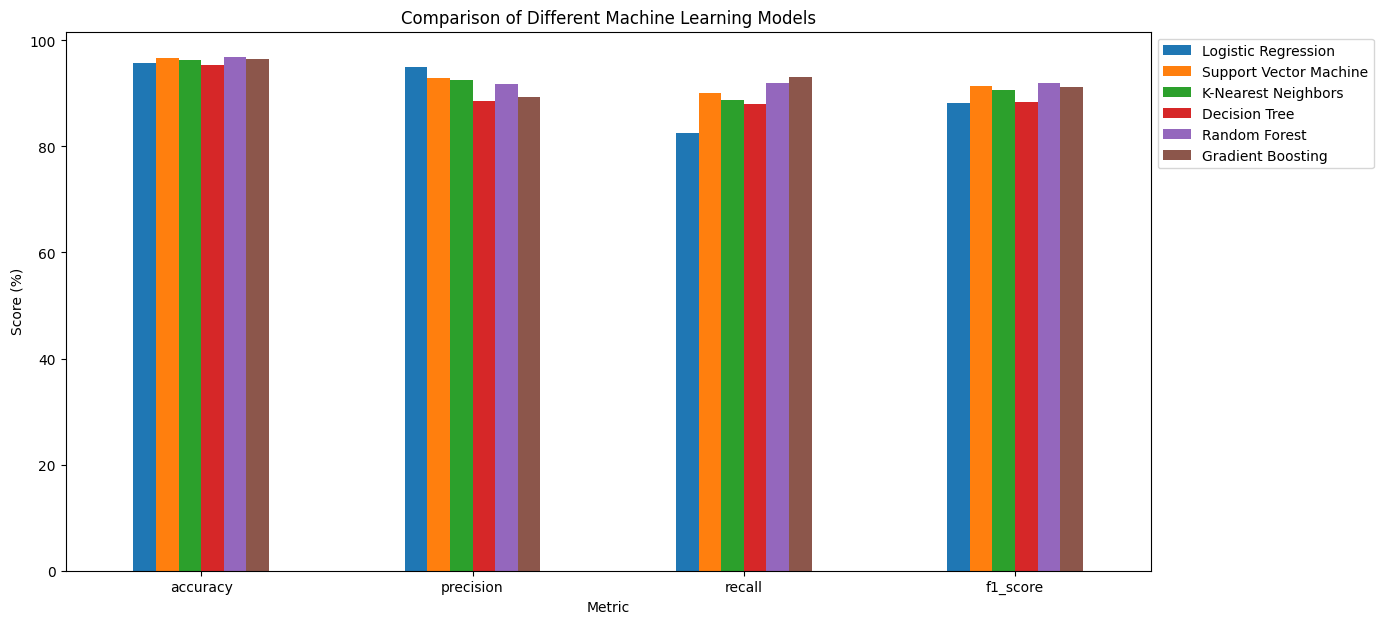

In [ ]:
# Create a summary of the results
results = {
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, y_pred_logreg),
        "precision": precision_score(y_test, y_pred_logreg),
        "recall": recall_score(y_test, y_pred_logreg),
        "f1_score": f1_score(y_test, y_pred_logreg)
    },
    "Support Vector Machine": {
        "accuracy": accuracy_score(y_test, y_pred_svm),
        "precision": precision_score(y_test, y_pred_svm),
        "recall": recall_score(y_test, y_pred_svm),
        "f1_score": f1_score(y_test, y_pred_svm)
    },
    "K-Nearest Neighbors": {
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn),
        "recall": recall_score(y_test, y_pred_knn),
        "f1_score": f1_score(y_test, y_pred_knn)
    },
    "Decision Tree": {
        "accuracy": accuracy_score(y_test, y_pred_dt),
        "precision": precision_score(y_test, y_pred_dt),
        "recall": recall_score(y_test, y_pred_dt),
        "f1_score": f1_score(y_test, y_pred_dt)
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "precision": precision_score(y_test, y_pred_rf),
        "recall": recall_score(y_test, y_pred_rf),
        "f1_score": f1_score(y_test, y_pred_rf)
    },
    "Gradient Boosting": {
        "accuracy": accuracy_score(y_test, y_pred_gb),
        "precision": precision_score(y_test, y_pred_gb),
        "recall": recall_score(y_test, y_pred_gb),
        "f1_score": f1_score(y_test, y_pred_gb)
    }
}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Convert results to percentages
results_df *= 100

# Transpose the DataFrame to switch rows and columns
results_df_transposed = results_df.T

# Plot the performance metrics for each model
results_df_transposed.plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Different Machine Learning Models')
plt.xlabel('Metric')
plt.ylabel('Score (%)')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()
